<a href="https://colab.research.google.com/github/tashfi04/swe-427-ML-assignments/blob/main/ML_Final_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tarfile as tarf
import os
from PIL import Image
import cv2
from keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, AvgPool2D

In [2]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [3]:
!gdown 1Ce9EfcikQohU-WIp1Mb1YyIRrZQPby5C

Downloading...
From: https://drive.google.com/uc?id=1Ce9EfcikQohU-WIp1Mb1YyIRrZQPby5C
To: /content/CNN_dataset.zip
100% 100M/100M [00:01<00:00, 84.1MB/s] 


In [4]:
!unzip 'CNN_dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: CNN_dataset/CXR/009317.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._009317.jpeg  
  inflating: CNN_dataset/CXR/002808.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._002808.jpeg  
  inflating: CNN_dataset/CXR/000835.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._000835.jpeg  
  inflating: CNN_dataset/CXR/001727.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._001727.jpeg  
  inflating: CNN_dataset/CXR/004525.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._004525.jpeg  
  inflating: CNN_dataset/CXR/006518.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._006518.jpeg  
  inflating: CNN_dataset/CXR/008855.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._008855.jpeg  
  inflating: CNN_dataset/CXR/009747.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._009747.jpeg  
  inflating: CNN_dataset/CXR/001377.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._001377.jpeg  
  inflating: CNN_dataset/CXR/004175.jpeg  
  inflating: __MACOSX/CNN_dataset

# Load Dataset

In [5]:
datasetPath = './CNN_dataset/'

imageCategories = sorted([
    x for x in os.listdir(datasetPath)
        if os.path.isdir(os.path.join(datasetPath, x))
        ])
imageCategoryCount = len(imageCategories)
images = [[os.path.join(datasetPath, className, x) 
                for x in os.listdir(os.path.join(datasetPath, className))] 
                    for className in imageCategories]

imageFileList = []
imageLabelList = []

for i, className in enumerate(imageCategories):
    imageFileList.extend(images[i])
    imageLabelList.extend([i] * len(images[i]))

totalImageCount = len(imageFileList)


print('Total Images: ', totalImageCount)
print('Image Categories: ', imageCategories)
print('Image Count in Each Category: ', [len(images[i]) for i in range(imageCategoryCount)])

Total Images:  50000
Image Categories:  ['AbdomenCT', 'CXR', 'ChestCT', 'Hand', 'HeadCT']
Image Count in Each Category:  [10000, 10000, 10000, 10000, 10000]


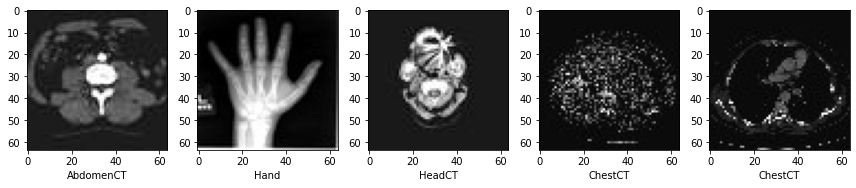

In [23]:
plt.subplots(1, 5, figsize=(12, 12))

for i, k in enumerate(np.random.randint(totalImageCount, size=5)):
    img = Image.open(imageFileList[k])
    arr = np.array(img)

    plt.subplot(1, 5, i + 1)
    plt.xlabel(imageCategories[imageLabelList[k]])
    plt.imshow(arr, cmap='gray')

plt.tight_layout()
plt.show()

# Split dataset into training & testing (80:20)

In [24]:
testFracData = 0.20
trainX, trainY = [], []
testX, testY = [], []

for i in range(totalImageCount):
    ran = np.random.random()
    if ran < testFracData:
        testX.append(cv2.imread(imageFileList[i]))
        testY.append(imageLabelList[i])
    else:
        trainX.append(cv2.imread(imageFileList[i]))
        trainY.append(imageLabelList[i])

print("Training Data: ",len(trainX))
print("Testing Data: ",len(testX))

Training Data:  39888
Testing Data:  10112


# Preprocess dataset

In [26]:
trainX = np.array(trainX)
trainY = np.array(trainY)
testX  = np.array(testX)
testY  = np.array(testY)

trainY = to_categorical(trainY, imageCategoryCount)
testY = to_categorical(testY, imageCategoryCount)

In [27]:
trainX = trainX.astype('float32') / 255
testX = testX.astype('float32') / 255

print("trainX Shape: ", trainX.shape, "trainY Shape: ", trainY.shape)

trainX Shape:  (39888, 64, 64, 3) trainY Shape:  (39888, 5)


# Build the model

In [28]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(2, 2),strides=(1, 1), padding='same', activation='relu', input_shape=(64, 64, 3))) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 64)                2097216   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

In [29]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model

In [30]:
modelLog=model.fit(trainX, trainY,
          batch_size=60,
          epochs=5,
          verbose=1,
          validation_split=.10)

Epoch 1/5
599/599 [==============================] - 131s 217ms/step - loss: 0.1855 - accuracy: 0.9305 - val_loss: 2.3534e-04 - val_accuracy: 1.0000
Epoch 2/5
599/599 [==============================] - 126s 210ms/step - loss: 0.0490 - accuracy: 0.9838 - val_loss: 5.4661e-05 - val_accuracy: 1.0000
Epoch 3/5
599/599 [==============================] - 134s 224ms/step - loss: 0.0300 - accuracy: 0.9892 - val_loss: 0.0031 - val_accuracy: 0.9992
Epoch 4/5
599/599 [==============================] - 122s 204ms/step - loss: 0.0226 - accuracy: 0.9921 - val_loss: 1.7073e-04 - val_accuracy: 1.0000
Epoch 5/5
599/599 [==============================] - 126s 211ms/step - loss: 0.0205 - accuracy: 0.9929 - val_loss: 3.3797e-06 - val_accuracy: 1.0000


# Evaluate the model using the test dataset

In [32]:
testPred = model.predict(testX)
testPredLabels = np.argmax(testPred, axis=1)
testTrueLabels = np.argmax(testY, axis=1)

316/316 [==============================] - 13s 41ms/step


In [48]:
confusionMatrix = confusion_matrix(testTrueLabels, testPredLabels)

print(confusionMatrix)

[[1985    0    0    0    0]
 [   0 2009    0    8    0]
 [   0    0 2032    0    0]
 [   0    5    2 2052    2]
 [   0    0    0    0 2017]]


In [49]:
print(classification_report(testTrueLabels,testPredLabels, target_names=imageCategories,digits=5))

              precision    recall  f1-score   support

   AbdomenCT    1.00000   1.00000   1.00000      1985
         CXR    0.99752   0.99603   0.99677      2017
     ChestCT    0.99902   1.00000   0.99951      2032
        Hand    0.99612   0.99563   0.99587      2061
      HeadCT    0.99901   1.00000   0.99950      2017

    accuracy                        0.99832     10112
   macro avg    0.99833   0.99833   0.99833     10112
weighted avg    0.99832   0.99832   0.99832     10112

